In [1]:
import numpy as np
import matplotlib.pyplot as plt
from preamble import *
import pandas as pd
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import sklearn
from matplotlib import font_manager, rc
%matplotlib inline
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)



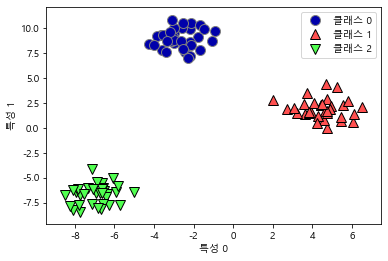

In [2]:
from sklearn.datasets import make_blobs 

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [3]:
# MUlti-class auto(Default)
logr = LogisticRegression().fit(X, y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수 배열:
 [[-0.385  0.629]
 [ 0.741 -0.177]
 [-0.356 -0.452]]


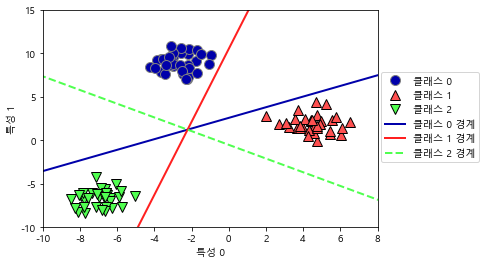

In [4]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c =color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

print("계수 배열:\n", logr.coef_)

계수 배열:
 [[-0.683  1.062]
 [ 1.365 -0.327]
 [-0.612 -0.733]]


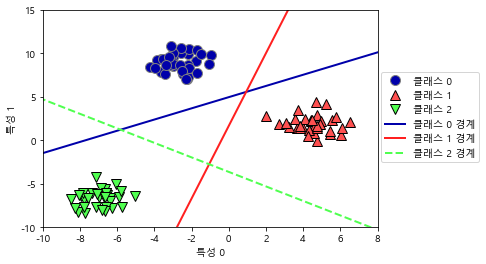

In [5]:
logr = LogisticRegression(multi_class = "ovr").fit(X, y)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c =color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

print("계수 배열:\n", logr.coef_)

계수 배열:
 [[-0.385  0.629]
 [ 0.741 -0.177]
 [-0.356 -0.452]]


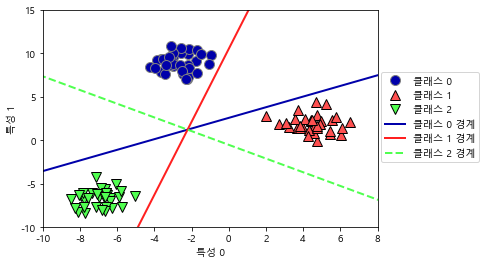

In [6]:
logr = LogisticRegression(multi_class = "multinomial").fit(X, y)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c =color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

print("계수 배열:\n", logr.coef_)

In [7]:
#iris logistic regression test
from sklearn.metrics import confusion_matrix
iris_dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40)
logr = LogisticRegression().fit(X,y)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

#오차 행렬, 정확도를 구하는데 이용됨
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("테스트 정확도: {: .2f}".format(logr.score(X_test, y_test)))
print("Number of mislabeled points out of a totla %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
테스트 정확도:  0.92
Number of mislabeled points out of a totla %d points : %d (60, 5)


In [8]:

logr2 = LogisticRegression(multi_class='ovr').fit(X,y)
logr2.fit(X_train, y_train)
y_pred = logr.predict(X_test)

#오차 행렬, 정확도를 구하는데 이용됨
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("테스트 정확도: {: .2f}".format(logr2.score(X_test, y_test)))
print("Number of mislabeled points out of a totla %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
테스트 정확도:  0.90
Number of mislabeled points out of a totla %d points : %d (60, 5)


In [9]:
print("predict:\n", logr.predict(X_test[:30]))
print("probability:\n", logr.predict_proba(X_test[:30]))

predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
probability:
 [[0.    0.123 0.877]
 [0.015 0.968 0.017]
 [0.987 0.013 0.   ]
 [0.    0.041 0.959]
 [0.971 0.029 0.   ]
 [0.    0.012 0.988]
 [0.982 0.018 0.   ]
 [0.004 0.727 0.269]
 [0.002 0.761 0.236]
 [0.026 0.932 0.042]
 [0.    0.319 0.681]
 [0.01  0.784 0.206]
 [0.006 0.838 0.156]
 [0.004 0.79  0.205]
 [0.006 0.761 0.233]
 [0.983 0.017 0.   ]
 [0.009 0.796 0.195]
 [0.014 0.9   0.086]
 [0.965 0.035 0.   ]
 [0.985 0.015 0.   ]
 [0.002 0.339 0.659]
 [0.014 0.768 0.218]
 [0.945 0.055 0.   ]
 [0.972 0.028 0.   ]
 [0.002 0.536 0.462]
 [0.994 0.006 0.   ]
 [0.955 0.045 0.   ]
 [0.014 0.901 0.085]
 [0.139 0.858 0.004]
 [0.962 0.038 0.   ]]


In [10]:
print("predict:\n", logr2.predict(X_test[:30]))
print("probability:\n", logr2.predict_proba(X_test[:30]))

predict:
 [2 1 0 2 0 2 0 2 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
probability:
 [[0.001 0.313 0.687]
 [0.029 0.937 0.034]
 [0.981 0.019 0.   ]
 [0.    0.333 0.667]
 [0.89  0.11  0.   ]
 [0.    0.187 0.813]
 [0.924 0.076 0.   ]
 [0.009 0.469 0.522]
 [0.005 0.587 0.409]
 [0.056 0.838 0.106]
 [0.    0.497 0.503]
 [0.021 0.511 0.468]
 [0.009 0.731 0.259]
 [0.008 0.625 0.367]
 [0.009 0.629 0.362]
 [0.919 0.081 0.   ]
 [0.014 0.654 0.331]
 [0.018 0.851 0.131]
 [0.81  0.19  0.   ]
 [0.972 0.028 0.   ]
 [0.002 0.425 0.573]
 [0.018 0.646 0.335]
 [0.852 0.148 0.   ]
 [0.752 0.248 0.   ]
 [0.003 0.468 0.529]
 [0.933 0.067 0.   ]
 [0.941 0.059 0.   ]
 [0.029 0.772 0.198]
 [0.17  0.823 0.006]
 [0.897 0.103 0.   ]]


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
#iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
#print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
#print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()) )






Accuracy:  1.0
Number of mislabeled points out of a total %d points : %d (38, 0)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.4)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
#print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
#print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()) )

Accuracy:  0.9333333333333333
Number of mislabeled points out of a total %d points : %d (60, 4)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
#print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
#print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()) )

Accuracy:  0.9333333333333333
Number of mislabeled points out of a total %d points : %d (15, 1)


In [14]:
# Cancer dataa

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)
classifierGN = GaussianNB().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(classifierGN.score(X_test, y_test)))


#암 데이터로는 Logistic이 더 예측을 잘한다는 것을 알 수 있다.
classifierLR = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(classifierLR.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(classifierLR.score(X_test, y_test)))




훈련 세트 점수: 0.946
테스트 세트 점수 : 0.937
훈련 세트 점수: 0.958
테스트 세트 점수 : 0.958


In [15]:

#2D Binary Classification Datasets
X, y = sklearn.datasets.make_moons(n_samples=100,  noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#옵션 criterion='gini', 가지분할 수행 기준: 이질성이 작아지는 방향으로 가지 분할 수행
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=4 ,random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.840
훈련 세트 정확도: 0.933
테스트 세트 정확도: 0.800


In [16]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))

for max_depth in [1, 4 , 8]:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    tree.fit(X_train, y_train)
    print("max_depth={}".format(max_depth))
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
    
#트리의 깊이가 깊어질 수록 훈련 정확도는 증가하는 것을 볼 수있다.

X_train.shape: (426, 30) X_test.shape:(143, 30)
max_depth=1
훈련 세트 정확도: 0.923
테스트 세트 정확도: 0.923
max_depth=4
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951
max_depth=8
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [17]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [18]:
#conda install python-graphviz
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

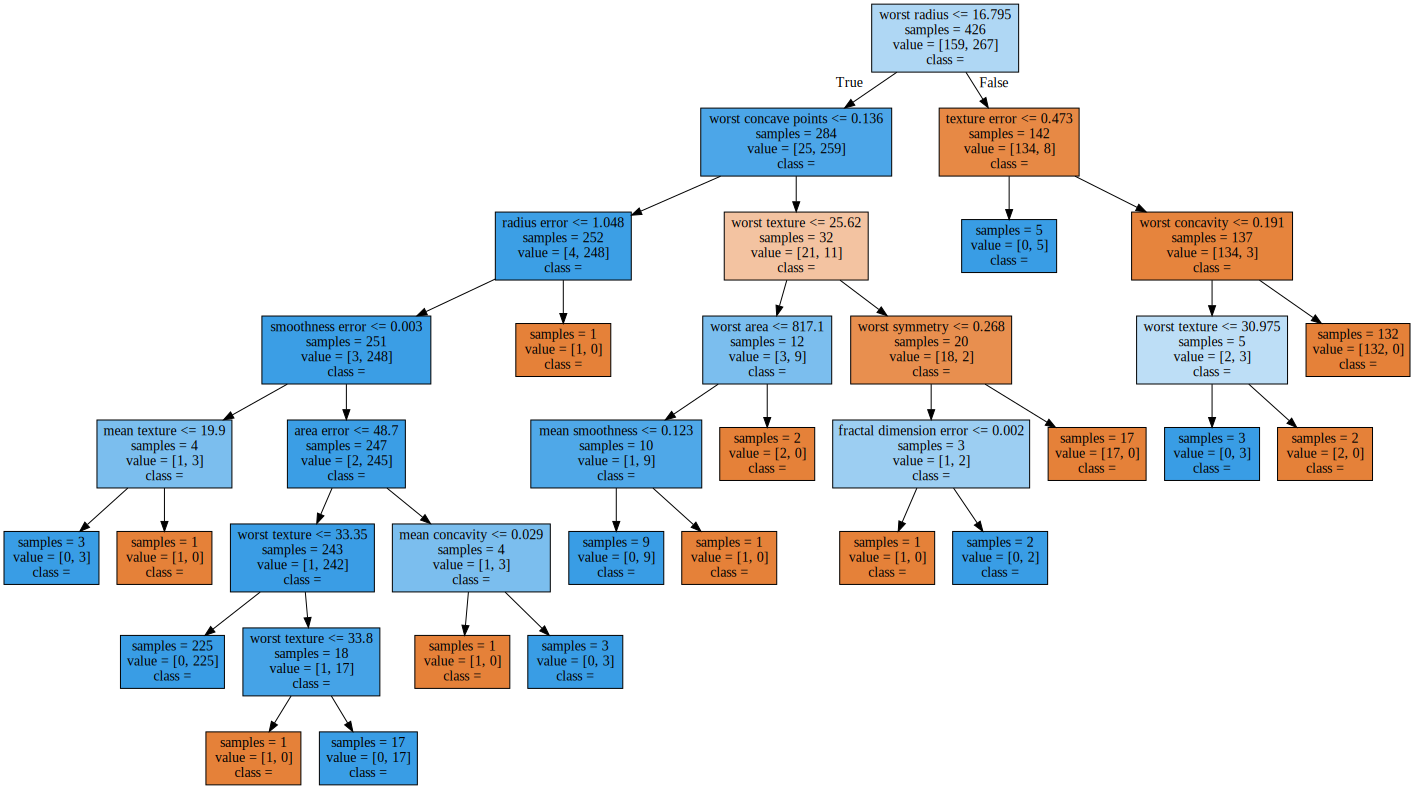

In [19]:
import graphviz

with open("tree.dot", encoding="UTF8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [20]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.    0.008 0.    0.    0.009 0.    0.008 0.    0.    0.    0.01  0.046
 0.    0.002 0.002 0.    0.    0.    0.    0.007 0.695 0.054 0.    0.014
 0.    0.    0.017 0.117 0.011 0.   ]


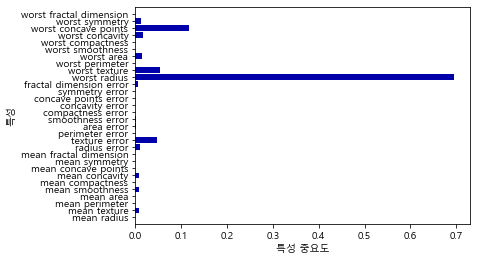

In [21]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


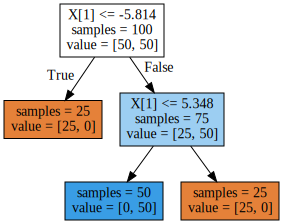

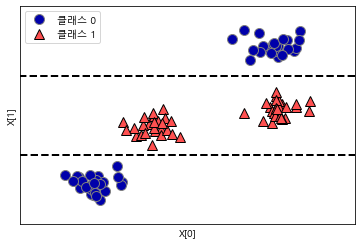

In [22]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)


ram_prices.shape: (333, 3)
ram_prices.keys: Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date     price
0           0  1957.0  4.11e+08
1           1  1959.0  6.79e+07
2           2  1960.0  5.24e+06
3           3  1965.0  2.64e+06
4           4  1970.0  7.34e+05


Text(0, 0.5, '가격 ($/Mbyte)')

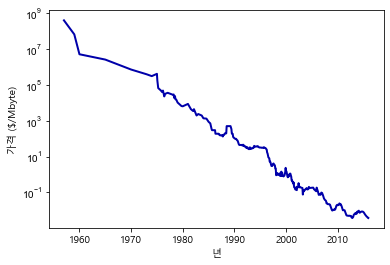

In [23]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

print("ram_prices.shape: {}".format(ram_prices.shape))
print("ram_prices.keys: {}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [24]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000 ]
data_test = ram_prices[ram_prices.date >= 2000]

print("data_train.shape: {} ".format(data_train.shape), "data_test.shape:{}".format(data_test.shape))

# 가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관게를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.shape: (202, 3)  data_test.shape:(131, 3)


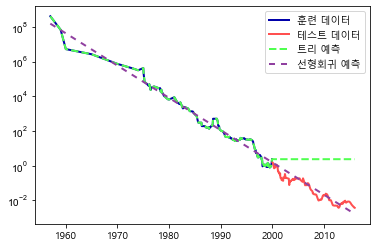

In [25]:
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

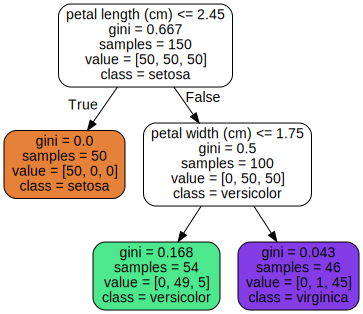

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
iris = load_iris()
X = iris.data[:,2:] #꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) 
tree_clf.fit(X, y)

export_graphviz(tree_clf,
               out_file="iris_tree.dot",feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True
               )
Source.from_file("iris_tree.dot")



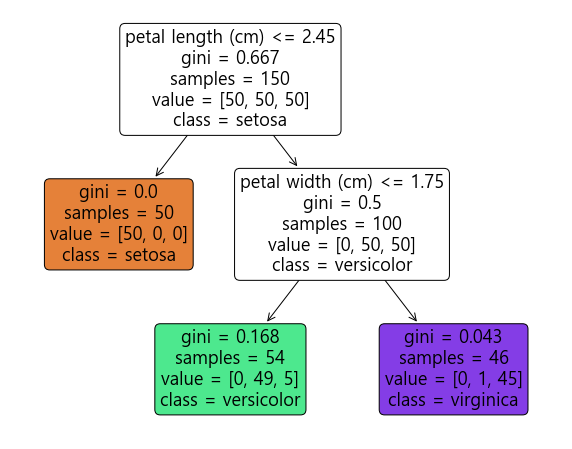

In [27]:
from sklearn.tree import plot_tree
# plot_Tree
#filled = True: 클래스별로 색깔 구분
#rounded = true
#max_depth = 2, 출력의 단계를 결정할 수 있다.

plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True, rounded = True, max_depth=2, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

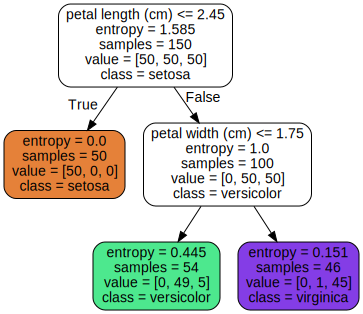

In [28]:

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
tree_clf.fit(X, y)

export_graphviz(tree_clf,
               out_file="iris_tree.dot",feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True
               )
Source.from_file("iris_tree.dot")



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [37]:
from sklearn.model_selection import cross_val_score

print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

# 5조각으로 나눠서 했을 때
cvscores = cross_val_score(forest, X, y, cv= 5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

#10 조각으로 나눠서 했을 때
cvscores = cross_val_score(forest, X, y, cv= 10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.920

테스트 세트 정확도 CV = 5: 0.860

테스트 세트 정확도 CV = 10: 0.840



In [38]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
dt.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test,y_test)))

cvscores = cross_val_score(dt, X, y, cv= 5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(dt, X, y, cv= 10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))

#랜덤 포레스트가 좀 더 결과가 좋아 보이지만, 조각의 수랑 데이터의 특성에 따라 달라진다

테스트 세트 정확도: 0.880

테스트 세트 정확도 CV = 5: 0.860

테스트 세트 정확도 CV = 10: 0.850



In [41]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))
print(cvscores)

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV = 10: 0.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


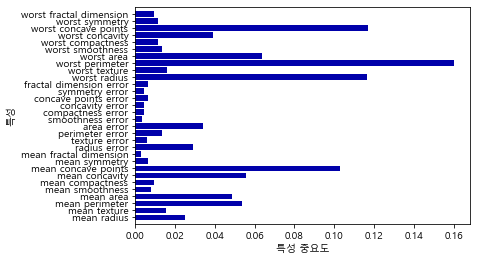

In [42]:
plot_feature_importances_cancer(forest)